<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-07 18:56:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  39.3MB/s    in 0.9s    

2024-11-07 18:56:25 (39.3 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [1]:
import sqlite3
import os
sqlitefile = 'm4_survey_data.sqlite'
fpfn=os.path.join(os.getcwd(), sqlitefile)
conn = sqlite3.connect(fpfn) # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [44]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


   index  ConvertedComp  count
0      1            0.0     26
1      2            4.0      1
2      3            5.0      1


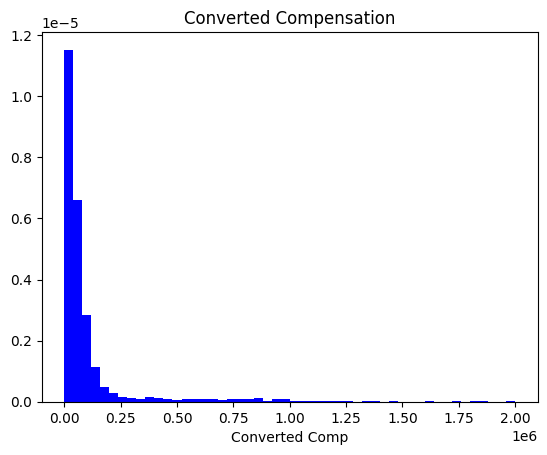

In [7]:
# your code goes here
QUERY = """
SELECT ConvertedComp, COUNT(*) as count
FROM master
group by ConvertedComp
order by ConvertedComp
"""
dfcc = pd.read_sql_query(QUERY,conn)
dfcc.dropna(subset=["ConvertedComp"], axis=0, inplace=True)
dfcc = dfcc.reset_index()
#dfcc.dropna(axis=1, inplace=True)  # drops if *any* cells are na, i wanted *all* cells na
dfcc.dropna(axis=1, how='all',  inplace=True)
dfcc = dfcc.reset_index(drop=True)
print(dfcc.head(3))

plt.hist(data=dfcc, x='ConvertedComp', bins=50, density=True, alpha=1, color='b')
plt.xlabel('Converted Comp')
plt.title('Converted Compensation')
plt.show()


### Box Plots


Plot a box plot of `Age.`


             Age       count
count  56.000000   56.000000
mean   42.946429  203.535714
std    18.426680  248.771671
min     0.000000    1.000000
25%    28.750000   11.000000
50%    42.500000   73.000000
75%    56.250000  329.250000
max    99.000000  787.000000 
dfage['Age'] col number is  0
55  -  Age      99.0
count     1.0
Name: 55, dtype: float64


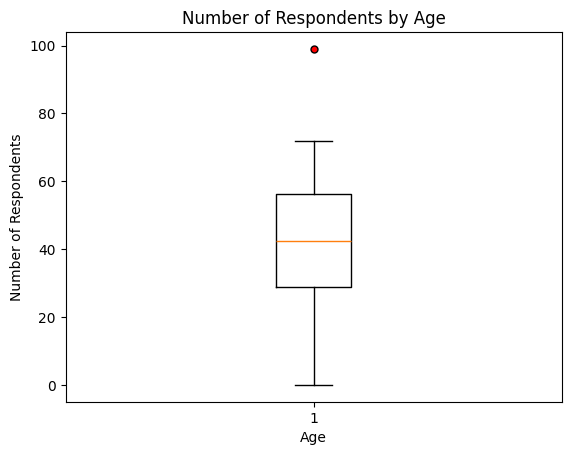

In [4]:
# your code goes here
QUERY = """
SELECT Age, COUNT(*) as count
FROM master
group by age
order by age
"""
dfage = pd.read_sql_query(QUERY,conn)
dfage['Age'] = dfage['Age'].astype(float)
dfage['Age'] = dfage['Age'].fillna(0.0).astype(float)
#dfage = dfage.set_index('Age')
print(dfage.describe(), "\ndfage['Age'] col number is ", dfage.columns.get_loc('Age'))
for row in range(dfage.shape[0]):
    if dfage.iloc[row,0]  >= 99:
        print(row, ' - ', dfage.iloc[row, :])
plt.boxplot(dfage['Age'], showfliers=True,
           flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5} )
### Fliers were not showing if seaborn was imported
plt.title('Number of Respondents by Age')
plt.ylabel('Number of Respondents')
plt.xlabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


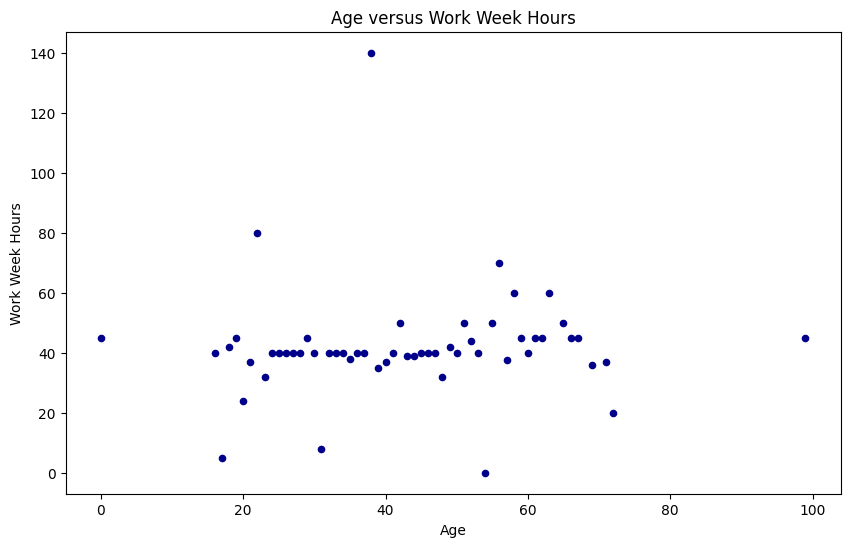

In [5]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, COUNT(*) as count
FROM master
group by age
order by age
"""
dfaw = pd.read_sql_query(QUERY,conn)
dfaw['Age'] = pd.to_numeric(dfaw['Age'], errors='coerce').fillna(0)  # so i can get some outliers
dfaw['WorkWeekHrs'] = pd.to_numeric(dfaw['WorkWeekHrs'], errors='coerce').fillna(0)
dfaw.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')
plt.title('Age versus Work Week Hours')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


    Age  WorkWeekHrs  CodeRevHrs
0   0.0       598.75       273.5
1  17.0        11.00         2.0


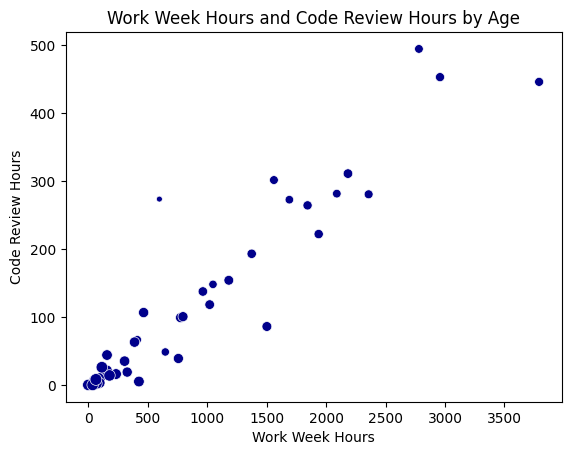

In [6]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs, COUNT(*) as count
FROM master
group by WorkWeekHrs, CodeRevHrs
order by WorkWeekHrs
"""
#%pip install plotly  or pip install plotly==5.24.1
import plotly.express as px
import seaborn as sns
dfawc = pd.read_sql_query(QUERY,conn)
dfawc['Age'] = pd.to_numeric(dfawc['Age'], errors='coerce').fillna(0)  # so i can get some outliers
dfawc['WorkWeekHrs'] = pd.to_numeric(dfawc['WorkWeekHrs'], errors='coerce').fillna(0)
dfawc['CodeRevHrs'] = pd.to_numeric(dfawc['CodeRevHrs'], errors='coerce').fillna(0)
bubs = dfawc.groupby('Age')[['WorkWeekHrs','CodeRevHrs']].sum().reset_index()
print(bubs.head(2))

sizeage = bubs['Age']
sns.scatterplot(data=bubs, x="WorkWeekHrs", y="CodeRevHrs", size=sizeage, color='darkblue', legend=False)
plt.xlabel('Work Week Hours')  # need proper scale
plt.ylabel('Code Review Hours')  # need proper scale
plt.title('Work Week Hours and Code Review Hours by Age')
#plt.xticks(np.arange(1, 80, 1))
#plt.yticks(np.arange(1, 40, 1))
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [47]:
QUERY = """
SELECT *, count(*) as count
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count desc
"""
dflang = pd.read_sql_query(QUERY,conn)
#print(dfdb[dfdb['LanguageWorkedWith'] == 'Python'])
print(dflang)

QUERY = """
select DatabaseWorkedWith, count(*) as count
FROM DatabaseWorkedWith
group by DatabaseWorkedWith
order by count desc
"""
dfdbww = pd.read_sql_query(QUERY,conn)
print(dfdbww)

QUERY = """
select DatabaseWorkedWith, count(*) as count
FROM DatabaseWorkedWith
where DatabaseWorkedWith = 'MySQL'
group by DatabaseWorkedWith
order by count desc
"""
dfdbww = pd.read_sql_query(QUERY,conn)

QUERY = """
select DatabaseWorkedWith, count(*) as count
FROM DatabaseWorkedWith
where DatabaseWorkedWith LIKE '%SQL%' or DatabaseWorkedWith LIKE '%sql%'
group by DatabaseWorkedWith
order by count desc
"""
dfdbww = pd.read_sql_query(QUERY,conn)
print(dfdbww)
print('dbwwsum = ', sum(dfdbww['count']))


    Respondent     LanguageWorkedWith  count
0            9             JavaScript   8687
1            9               HTML/CSS   7830
2            4                    SQL   7106
3            9  Bash/Shell/PowerShell   4642
4            4                 Python   4542
5           19                   Java   4506
6            4                     C#   4288
7            9             TypeScript   3232
8           13                    PHP   2913
9            4                    C++   1946
10           4                      C   1578
11           9                   Ruby   1149
12          60                     Go   1114
13           9              Other(s):    840
14          62                 Kotlin    751
15          26                  Swift    707
16          16                    VBA    628
17          20                      R    585
18          43            Objective-C    518
19         116                  Scala    492
20         115               Assembly    437
21        

(5, 3)
   Respondent DatabaseDesireNextYear  count
0           9             PostgreSQL   4328
1          16                MongoDB   3649
2           9                  Redis   3331
3           4                  MySQL   3281
4          16          Elasticsearch   2856


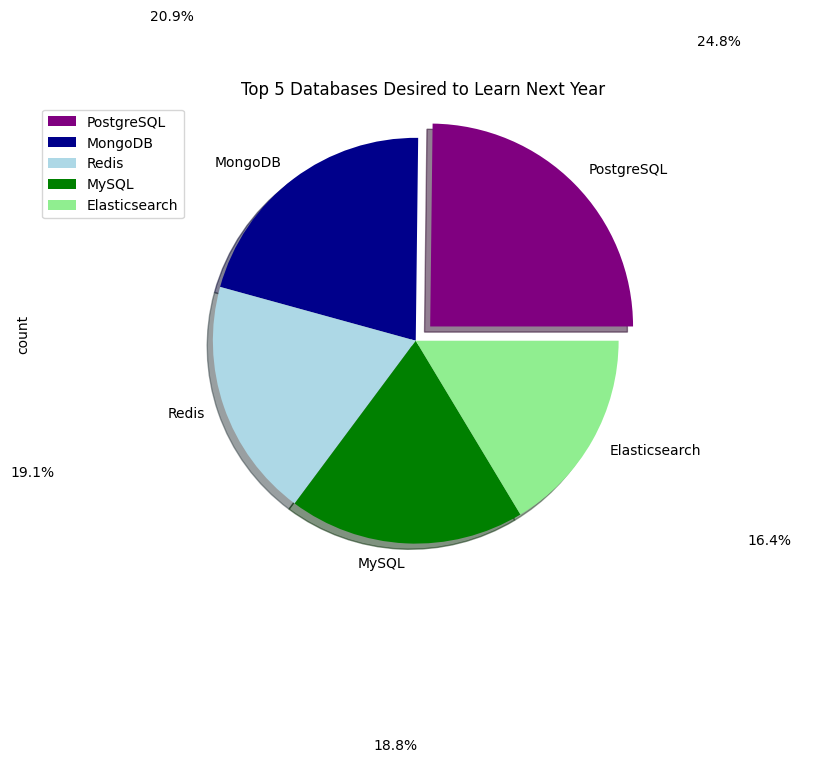

In [41]:
# your code goes here
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe
QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)
#pd.read_sql_query(QUERY,conn)
# AttributeError: 'DataFrame' object has no attribute 'read_sql_query'
#print(df.iat[0,0])

QUERY = """
SELECT *, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""
dfdb = pd.read_sql_query(QUERY,conn)
print(dfdb.shape)
print(dfdb.head())
#dfdbg = dfdb.groupby('DatabaseDesireNextYear')['count']
colorslist = ['purple','darkblue','lightblue','green','lightgreen']
exlist = [0.1, 0, 0, 0, 0]

dfdb['count'].plot(kind='pie',figsize=(10, 6),labels=dfdb['DatabaseDesireNextYear'].values,
        autopct='%1.1f%%',startangle=0,colors=colorslist,shadow=True,
        explode=exlist,pctdistance=2)
plt.axis('equal')
#plt.ylabel(dfdb['DatabaseDesireNextYear'])
plt.legend(labels=dfdb['DatabaseDesireNextYear'], loc='upper left')
plt.title("Top 5 Databases Desired to Learn Next Year",)
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


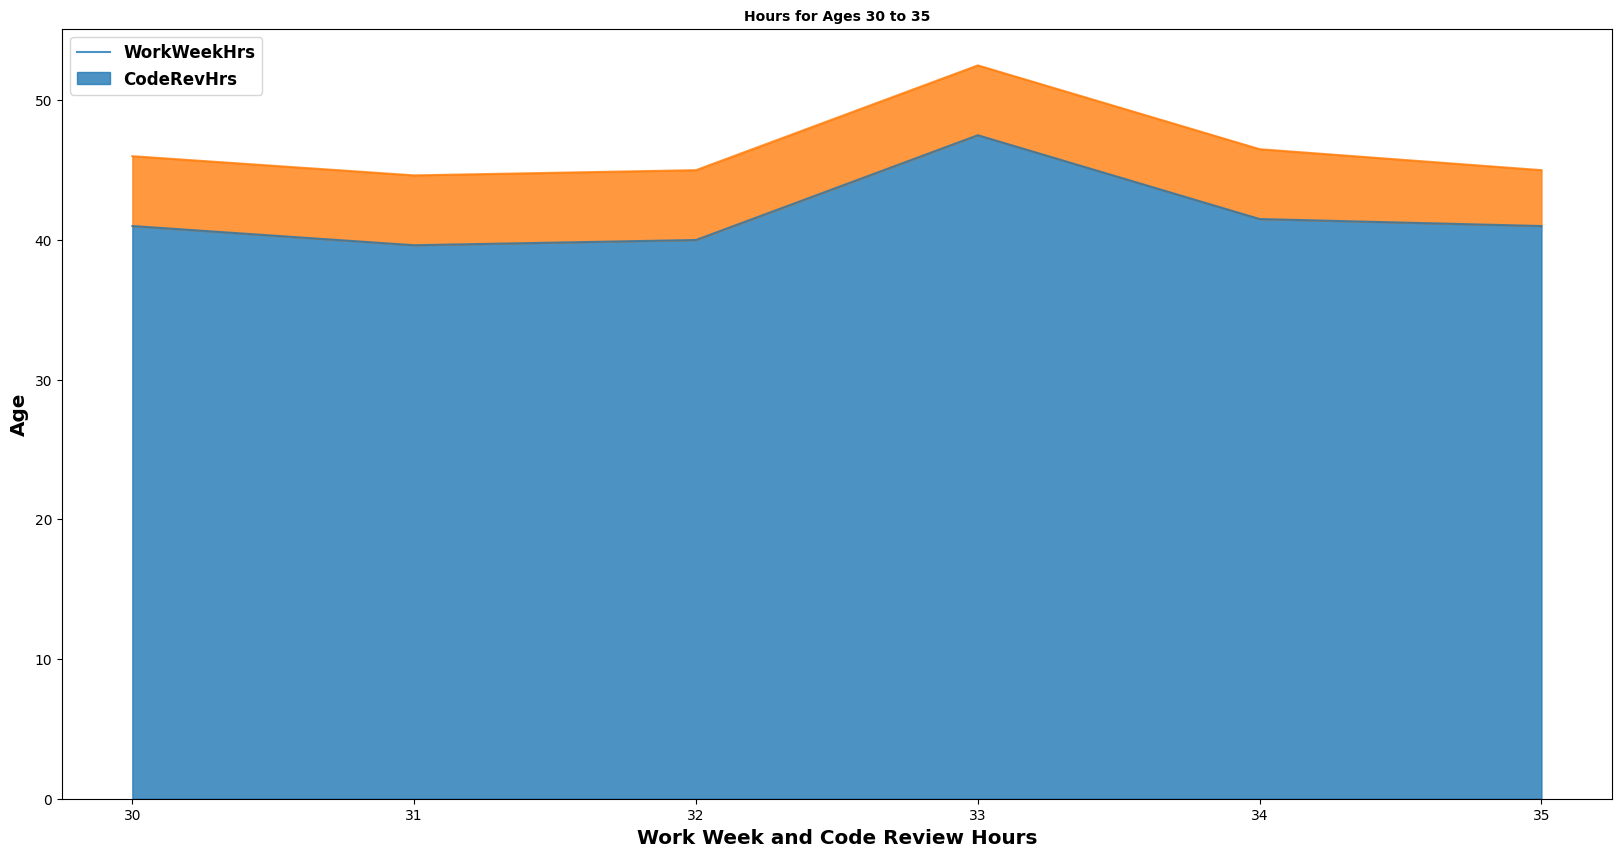

In [18]:
# your code goes here
# Stacked chart using area, it could also be plt.stackplot()
df30s = dfawc[(dfawc['Age'] >= 30) & (dfawc['Age'] <=35)]
df30s = df30s.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
#df30s = df30s.reset_index()
#df30sc = df30s[['WorkWeekHrs','CodeRevHrs']]
df30s.plot(kind='area',alpha=0.8, figsize=(20, 10))
plt.title('Hours for Ages 30 to 35',fontsize='x-large',font={'weight':'bold'} )
plt.ylabel('Age',fontsize='x-large',font={'weight':'bold'})
plt.xlabel('Work Week and Code Review Hours',fontsize='x-large',font={'weight':'bold'})
plt.legend(labels=['WorkWeekHrs','CodeRevHrs'], loc='upper left',
           fontsize='x-large', prop={'size':12,'weight':'bold'}, markerscale=2)
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


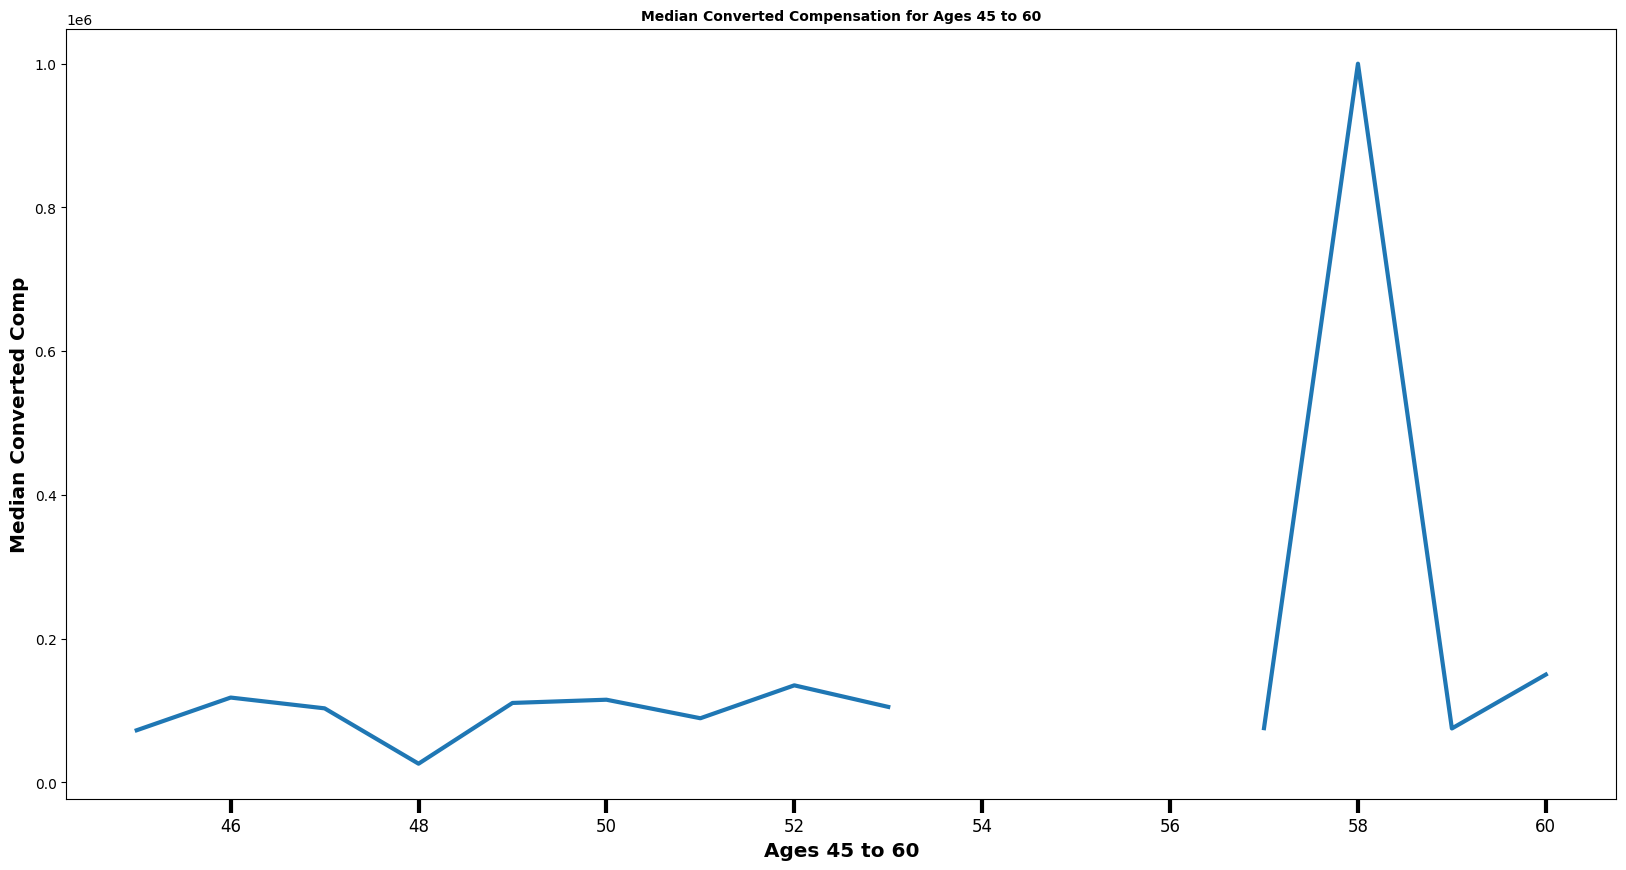

In [49]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
where Age >= 45 and Age <= 60
group by Age
order by Age
"""
dfmid = pd.read_sql_query(QUERY,conn)

#dfmid = dfcca[(dfcca['Age'] >= 45) & (dfcca['Age'] <=60)]
#print(dfmid.head(20))
dfmid = dfmid.groupby('Age')['ConvertedComp'].median()
#dfmid = dfmid.rename(columns={"ConvertedComp" : "MedianCC"} ) # TypeError: rename() got an unexpected keyword argument 'columns'
# shoule probably be dfmid.column.reaname(columns={...]

dfmid.plot(kind='line', alpha=1, figsize=(20, 10), linewidth=3)
plt.title("Median Converted Compensation for Ages 45 to 60",fontsize='x-large',font={'weight':'bold'})
plt.xlabel('Ages 45 to 60',fontsize='x-large',font={'weight':'bold'})
plt.ylabel('Median Converted Comp',fontsize='x-large',font={'weight':'bold'})
plt.tick_params(axis='x', color='black', width=3, length=10, labelsize=12)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


['I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work']


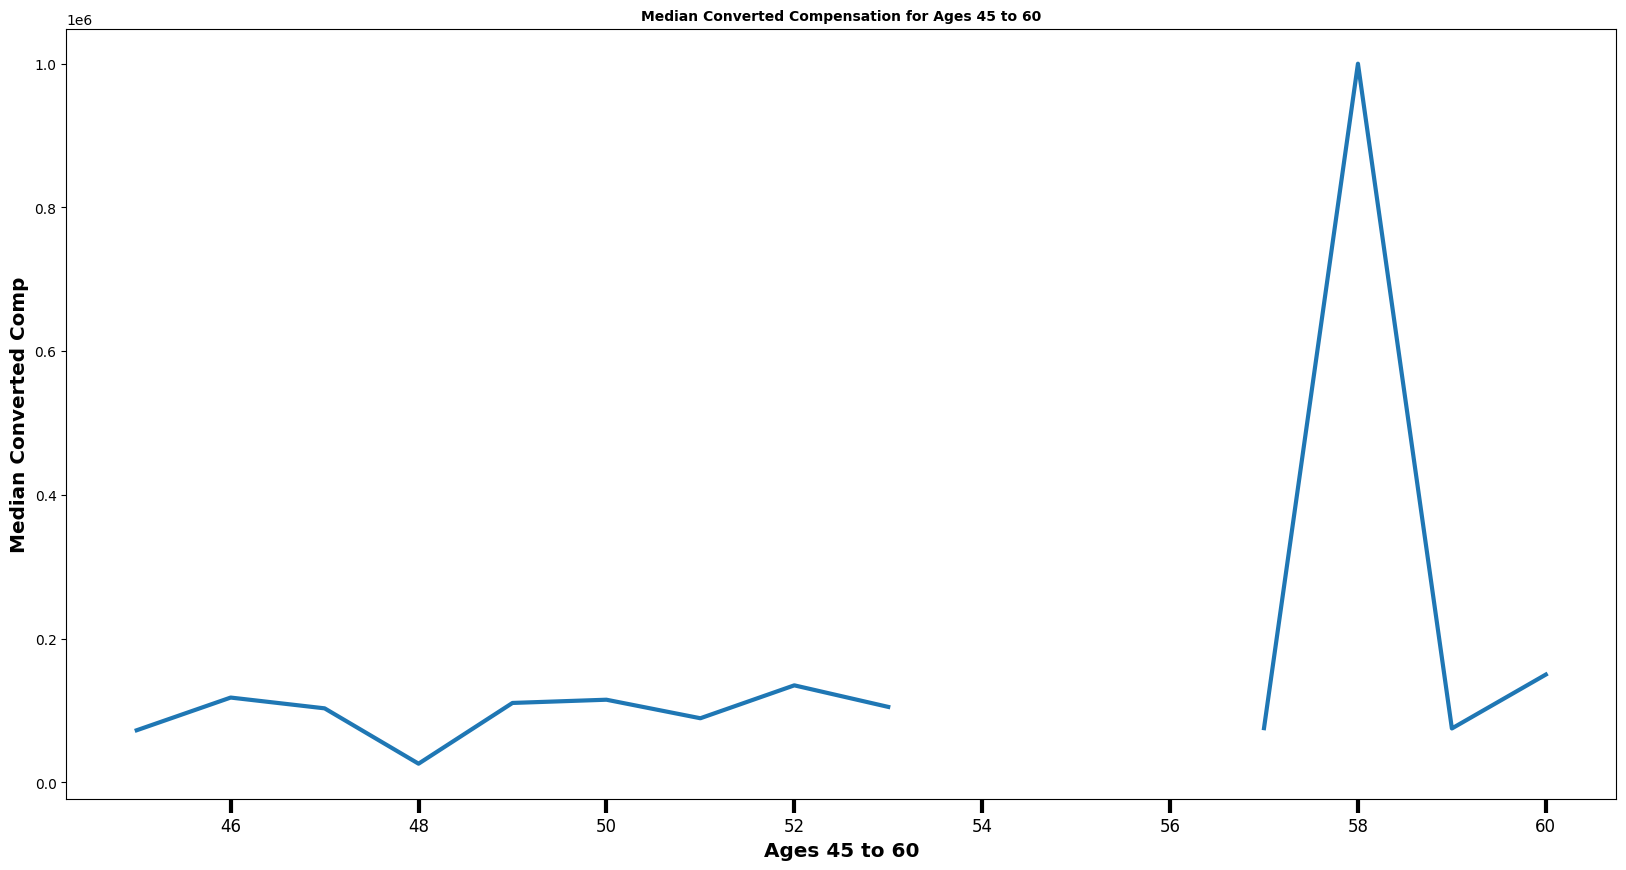

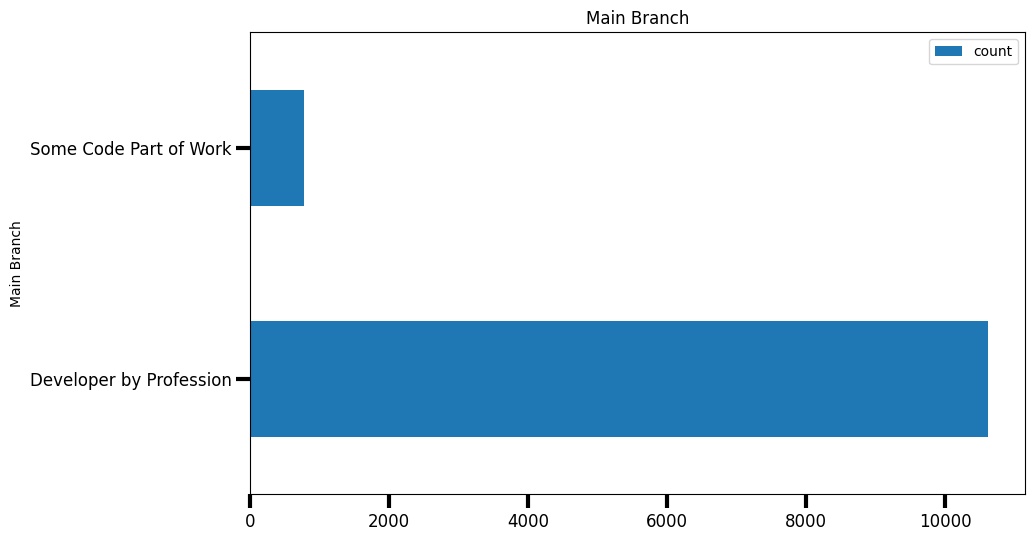

In [20]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
group by MainBranch
order by MainBranch
"""
dfmb = pd.read_sql_query(QUERY,conn)
print(dfmb['MainBranch'].values)

dfmb.plot(kind='barh', figsize=(10,6))
plt.ylabel('Main Branch')
plt.yticks([0,1], ['Developer by Profession','Some Code Part of Work'])
plt.title('Main Branch')
plt.tick_params(axis='both',color='black', width=3, length=10, labelsize=12)

plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
